<a href="https://colab.research.google.com/github/R0N3ldrt/Thesis/blob/main/new_spectrum_analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Constellation

# Loading Necesary Libraries

In [22]:
# Importing necesary libraries
# Libraries for correct code execution 

import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import random
import csv
import re
from tqdm import tqdm

from random import random, gauss
from math import modf, pi, cos, sin, sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots
from scipy.signal import savgol_filter

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

# Load Enviroment

In [23]:
# BLOQUE PARA USAR DESDE COLAB

# Google drive loading as work station for local-usage of the files.
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

#-----------------------------------------------------------------------------

Mounted at /content/gdrive


In [24]:
# Lista para cambiar los paths rapido.
workers = ["Ronald", "Local"]

# Change the number to change the paths.
worker = workers[0]

if worker == "Ronald":
  path = "/content/gdrive/MyDrive/Thesis_Workstation/ANN_dataset"
else: path = os.getcwd()

# Load Datasets

In [25]:
input_path = path + "/Spectrum/16QAM/25spans80km_withoutROADMs/dataSet_Spectrum31MHz_Samples_16QAM_75GHz_LongHaul_input_25x80km.xlsx"

In [26]:
df = pd.read_excel(input_path, sheet_name = "Sheet1", skiprows=1)

In [27]:
# Dropping rows that are empty
drop_rows = [drop_row for drop_row in range(325, df.shape[0])]
df_13_samples = df.drop(drop_rows)

In [28]:
print([row for row in range(1, 14)])
print([row for row in range(0, 25)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [29]:
# Adding missing PBRS_id
snippet = []
val_cnt = 1
idx = 0
for sample in range(1, 14):
  for sample_id in range(0, 25):
    df_13_samples.at[idx, 'PBRS_id'] = val_cnt
    idx +=1
    snippet.append(val_cnt)
  val_cnt += 1
df_13_samples['PBRS_id'] = df_13_samples['PBRS_id'].astype(int)

In [30]:
display(df_13_samples)

,row,PBRS_id,Channels,Distance_km,power_dBm,#span,-40,-39.96875,-39.9375,-39.90625,...,39.7187499999999,39.7499999999999,39.7812499999999,39.8124999999999,39.8437499999999,39.8749999999999,39.9062499999999,39.9374999999999,39.9687499999999,39.9999999999999
0,1,1,1,80.0,0,1,-334.501270,-333.132364,-325.572794,-336.320168,...,-335.056696,-328.066995,-325.754530,-328.066995,-328.066995,-325.395278,-321.992445,-328.886037,-322.977492,-335.056696
1,2,1,1,160.0,0,2,-338.049215,-327.846616,-327.474368,-338.873124,...,NaN,-321.746918,-326.565933,-322.586533,-341.617433,-322.586533,NaN,-331.617433,-328.607133,-328.144133
2,3,1,1,240.0,0,3,-335.915875,-332.459387,-349.826960,-328.583144,...,-326.872508,-333.434423,-329.882808,-329.882808,-331.686340,-325.665740,-335.903408,-326.872508,-329.882808,-328.913708
3,4,1,1,320.0,0,4,-330.110140,-337.262521,-332.736237,-339.124990,...,-336.294415,-330.273815,-329.274286,-329.304715,-321.242915,-320.731390,-328.335615,-325.154982,-326.294415,-330.273815
4,5,1,1,400.0,0,5,-336.413189,-330.762275,-332.048845,-337.871202,...,-331.093800,-336.602875,NaN,-329.155600,-324.104100,NaN,-333.027762,NaN,-343.135000,-337.114400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,321,13,1,1680.0,0,21,-54.561583,-44.613902,-41.167754,-40.733658,...,-46.796297,-44.789001,-49.459724,-43.774488,-46.750014,-45.695103,-43.781436,-40.756417,-49.368974,-35.147507
321,322,13,1,1760.0,0,22,-58.293111,-50.937024,-40.632352,-55.283881,...,-54.613867,-42.210508,-41.569807,-46.446182,-52.601701,-45.139597,-46.657479,-50.439532,-45.279847,-47.112150
322,323,13,1,1840.0,0,23,-56.360107,-49.076076,-38.904166,-42.718141,...,-44.865531,-40.877947,-38.035555,-43.307802,-44.275443,-39.932980,-42.285547,-55.159451,-42.410064,-47.629492
323,324,13,1,1920.0,0,24,-48.972740,-44.050182,-48.665758,-48.660555,...,-40.742621,-58.084123,-43.044080,-43.606192,-43.880028,-49.691087,-46.022193,-47.717701,-39.202819,-51.550857


In [31]:
df_mean_sample = df_13_samples.groupby(['PBRS_id']).mean()
df_mean_sample.drop(['row', 'Channels', 'Distance_km', 'power_dBm'], axis = 1, inplace = True)
df_mean_sample

,-40.00000,-39.96875,-39.93750,-39.90625,-39.87500,-39.84375,-39.81250,-39.78125,-39.75000,-39.71875,...,39.71875,39.75000,39.78125,39.81250,39.84375,39.87500,39.90625,39.93750,39.96875,40.00000
PBRS_id,,,,,,,,,,,,,,,,,,,,,
1,-161.366410,-159.535241,-160.530003,-161.087030,-160.780780,-163.037811,-162.465773,-159.977524,-157.776528,-159.300021,...,-151.467932,-152.297526,-152.019794,-158.532268,-157.989271,-149.717553,-151.535573,-151.239345,-151.782028,-151.687344
2,-45.203167,-43.674644,-45.448103,-43.509912,-43.514981,-42.360495,-43.772949,-43.917003,-42.476215,-46.144048,...,-42.872490,-44.734424,-42.346068,-44.352750,-45.287863,-44.465539,-45.237554,-45.029727,-41.662165,-42.966894
3,-43.501545,-43.615833,-48.334108,-45.147418,-44.915424,-43.762551,-44.323687,-45.517941,-45.318144,-43.441433,...,-46.565659,-43.171613,-42.296158,-43.825442,-44.177847,-46.218210,-44.700303,-45.288627,-44.594246,-44.867329
4,-43.991016,-44.123524,-48.024017,-44.174469,-45.096165,-43.728466,-44.024996,-47.508741,-44.761465,-45.525856,...,-44.090065,-42.219582,-46.699300,-43.677533,-44.132871,-43.606103,-43.778083,-44.237445,-43.635698,-44.880627
5,-160.891002,-161.054277,-160.530814,-160.811141,-159.781719,-163.704343,-159.341662,-160.244960,-159.749403,-158.976227,...,-151.390561,-158.718400,-159.356074,-135.709388,-159.946393,-149.906700,-158.282615,-152.172110,-156.995349,-152.924219
6,-44.180268,-45.736892,-45.314358,-45.364368,-44.807208,-42.730173,-45.518530,-45.468085,-46.964487,-42.695511,...,-46.183938,-45.424949,-45.011371,-42.567504,-45.451215,-44.528479,-43.351114,-46.405930,-44.930816,-46.283201
7,-43.534906,-44.753218,-44.012803,-46.765178,-43.218732,-45.382825,-45.247823,-46.573077,-46.034684,-44.306856,...,-45.808901,-43.082008,-44.123827,-46.535453,-44.259797,-44.353882,-43.156051,-46.294412,-45.251799,-44.973886
8,-45.929721,-44.422099,-44.492655,-47.882246,-45.651299,-46.369690,-46.964449,-47.702719,-46.501585,-46.542697,...,-45.466616,-44.983112,-45.930057,-46.582384,-44.019602,-43.511704,-45.376961,-44.376539,-46.291428,-46.728270
9,-104.168036,-102.993545,-103.871321,-104.534794,-104.144909,-103.627071,-103.782684,-102.586312,-104.880894,-102.218892,...,-100.478657,-101.828617,-103.434300,-104.480971,-103.809133,-104.349362,-102.570295,-92.737572,-101.886267,-92.415081


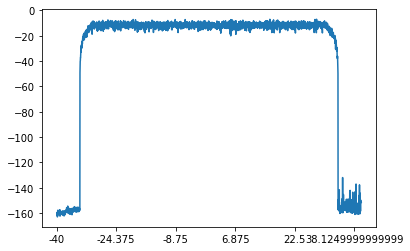

In [32]:
test_df = df_mean_sample.iloc[[0]]
sample_1 = test_df.iloc[0].squeeze()
sample_1.plot()
plt.show()

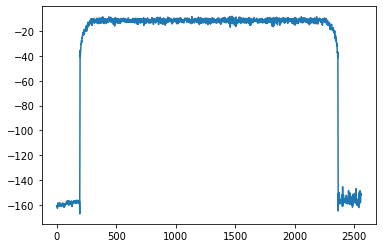

In [33]:
smoothed_2dg = savgol_filter(test_df, window_length = 5, polyorder = 2)
gfg = pd.Series(smoothed_2dg[0])
gfg.plot()
plt.show()

In [71]:
def prime_number_finder(stop_gap, total_num_of_data):
  prime_nums = []
  i=2
  while i <= stop_gap:
    if (total_num_of_data % i==0):
      prime_nums.append(i)
    i+=1
  return prime_nums

def aggreagator_selection(stop_gap=25, total_num_of_data=1281, min_prime = False):
  current_freq_offset = 0.03125
  
  # Find the prime numbers where the total_num_of_data is divisible
  prime_nums = prime_number_finder(stop_gap, total_num_of_data)
  
  # Find the offsets of the new aggregators
  new_freq_offsets = []
  for nums in prime_nums:
    freq_offset = current_freq_offset*(nums-1)
    new_freq_offsets.append(freq_offset)

  if min_prime == False:
    # Ask the user for the desired aggregator
    print('Please select one of the following prime number to conduct the aggregation {} with frequencies offsets of {}(PHz) respectively. (Current Freq offset is 0.03125 PHz)'.format(prime_nums, new_freq_offsets))
    while True:
      user_selection = input('Prime number to conduct the aggregation? ')
      if int(user_selection) not in prime_nums:
        print('Please select one of the available prime numbers. (Current selection is not avaliable)')
      else:
        break
    return int(user_selection)
  else:
    user_selection = min(prime_nums)
    freq_selected = min(new_freq_offsets)
    print('Selected the least common denominator for aggregation ({}) with a frequency of {}.'.format(user_selection, freq_selected))
    return int(user_selection)

def aggreagator(df, stop_gap=25, total_num_of_data=1281, min_prime = True):
  agg_num = aggreagator_selection(stop_gap, total_num_of_data, min_prime = False)
  
  # Creating new df of aggregate values
  agg_df = pd.DataFrame()
  agg_df = df[df.columns[0:5]]

  agg=0
  loop_cnt=0
  init_column_cnt = 5
  while agg<=total_num_of_data:
    loop_cnt+=1
    # Obtain current last columns stop
    agg=agg_num+init_column_cnt
    # Select working columns
    new_df = df[df.columns[init_column_cnt:agg]]

    init_column_cnt += (agg_num)
    #print(init_column_cnt)
    # Get average of freq values for new header
    headers = list(new_df.columns.values)
    headers_array = np.asarray(headers)
    new_header_name = np.mean(headers_array)

    # Add aggragated values to new df
    agg_df[str(new_header_name)] = new_df.mean(axis = 1)
  agg_dict = agg_df.to_dict()
  return agg_df, agg_dict

def aggreagator_v2(df, stop_gap=35, total_num_of_data=1281, min_prime = True):
  arr_prime = prime_number_finder(stop_gap, total_num_of_data)
  agg_num = np.max(arr_prime)

  # Creating new df of aggregate values
  agg_df = pd.DataFrame()

  mid_point = df.shape[1]/2

  agg=0
  loop_cnt=0
  init_column_cnt = 5
  while agg<=total_num_of_data:
    loop_cnt+=1
    # Obtain current last columns stop
    agg=agg_num+init_column_cnt
    # Select working columns
    new_df = df[df.columns[init_column_cnt:agg]]

    init_column_cnt += (agg_num)

    headers = list(new_df.columns.values) 
    if loop_cnt <= mid_point:
      # Get average of freq values for new header
      new_header_name  = headers[-1]
      print(new_header_name)
    else:
      new_header_name = headers[0]
    
    # Add aggragated values to new df
    agg_df[str(new_header_name)] = new_df.mean(axis = 1)
  return agg_df

In [73]:
# Adding back headers

new_df = pd.DataFrame(smoothed_2dg)

rename_col = {}
cnt = 0
for col in df_mean_sample.columns:
  rename_col[cnt] = col
  cnt += 1

new_df.rename(columns=rename_col, inplace=True)

display(new_df)

,-40.00000,-39.96875,-39.93750,-39.90625,-39.87500,-39.84375,-39.81250,-39.78125,-39.75000,-39.71875,...,39.71875,39.75000,39.78125,39.81250,39.84375,39.87500,39.90625,39.93750,39.96875,40.00000
0,-160.956945,-160.435261,-160.286735,-160.75685,-161.536687,-162.497364,-162.355149,-159.871772,-158.589824,-158.286812,...,-148.426025,-152.077811,-153.883498,-157.403203,-156.404267,-152.290905,-150.236389,-151.619011,-151.824294,-151.602934


In [57]:
def remove_tail(df, cut_val):
  old_val = 0
  delta = 0
  mid_point = int(df.shape[1]/2)

  for i in range(0, df.shape[1]):
    if i == 0:
      cell_val = agg_df.iloc[[0], i]
      old_val = cell_val[0]
    else:
      cell_val = agg_df.iloc[[0], i]
      val = cell_val[0]
      delta = abs(old_val-val)
      old_val = val
      if delta > cut_val:
        print(val)



In [72]:
agg_df = aggreagator_v2(new_df, stop_gap=25, total_num_of_data=1281, min_prime = True)

input = path + "/test.csv"
#agg_df.to_csv(input)

-39.21875
-38.5625
-37.90625
-37.25
-36.59375
-35.9375
-35.28125
-34.625
-33.96875
-33.3125
-32.65625
-32.0
-31.34375
-30.6875
-30.03125
-29.375
-28.71875
-28.0625
-27.40625
-26.75
-26.09375
-25.4375
-24.78125
-24.125
-23.46875
-22.8125
-22.15625
-21.5
-20.84375
-20.1875
-19.53125
-18.875
-18.21875
-17.5625
-16.90625
-16.25
-15.59375
-14.9375
-14.28125
-13.625
-12.96875
-12.3125
-11.65625
-11.0
-10.34375
-9.6875
-9.03125
-8.375
-7.71875
-7.0625
-6.40625
-5.75
-5.09375
-4.4375
-3.78125
-3.125
-2.46875
-1.8125
-1.15625
-0.5
0.15625


In [58]:
remove_tail(agg_df, cut_val=50)

-38.310028428139596
